# Final Project: Methods for Population Growth Projections

## Logistic Growth

Below is the standard logistic growth model, defined as $P(t) = \frac{e^{\gamma t}}{1 + \frac{N_0}{K} (e^{\gamma t} - 1)}$

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pop_change_df = pd.read_csv('data/pop_change.csv', index_col=0, header=0, skiprows=[], thousands=',')
# pop_change_df.apply(pd.to_numeric)

In [57]:
country_total = pop_change_df.as_matrix()[0]

In [58]:
times = np.arange(1910,2020,10)

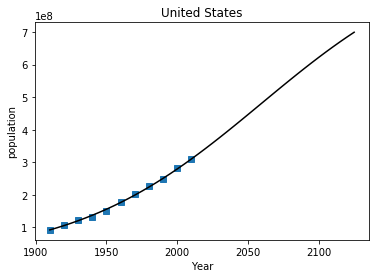

In [59]:
dN = (country_total[2:]-country_total[:-2])/(times[2:]-times[:-2])
P = dN / country_total[1:-1]
X = np.asarray([np.ones(9), country_total[1:-1]]).transpose()
Y = np.asarray(P)
alpha = np.linalg.lstsq(X,Y)[0]
gamma = alpha[0]
K = (-gamma) / alpha[1]
    
# compute the model estimate for the population development
t_estimate = np.arange(1910, 2130, 5)
N0=country_total[0]
t_model=t_estimate-1910
N=K*(N0/K)*np.exp(gamma*t_model)/(1+(N0/
K)*(np.exp(gamma*t_model)-1))
plt.figure()
plt.plot(times, country_total, 's')
plt.plot(t_estimate, N, 'k')
plt.xlabel('Year')
plt.ylabel('population')
plt.title('United States')
plt.show()

## Logistic Growth Augmented with Migration

## Modified Lotka-Volterra